In [ ]:
#!pip install fadapa

In [1]:
# import fadapa
from fadapa import Fadapa
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dirs = os.listdir()
print(dirs)

['Folivaceus_R1_fastqc', '.DS_Store', 'Fnottii_USPD16092508-N705-AK390_HV3JCCCXY_L7_2_fastqc', 'Fcat_USPD16092508-N711-AK392_HV3JCCCXY_L7_2_fastqc', 'Fnottii_USPD16092508-N705-AK390_HV3JCCCXY_L6_2_fastqc', 'Fcat_USPD16092508-N711-AK392_HV3JCCCXY_L6_2_fastqc', 'Axenica_USPD16092508-N706-AK391_HV3JCCCXY_L7_1_fastqc', 'Axenica_USPD16092508-N706-AK391_HV3JCCCXY_L6_1_fastqc', 'README.md', 'Folivaceus_R2_fastqc', 'plots_all_fadapa.ipynb', '.ipynb_checkpoints', 'Fnottii_USPD16092508-N705-AK390_HV3JCCCXY_L6_1_fastqc', 'Fcat_USPD16092508-N711-AK392_HV3JCCCXY_L6_1_fastqc', 'Fnottii_USPD16092508-N705-AK390_HV3JCCCXY_L7_1_fastqc', 'Fcat_USPD16092508-N711-AK392_HV3JCCCXY_L7_1_fastqc', 'multifastqc_plot.png', 'Axenica_USPD16092508-N706-AK391_HV3JCCCXY_L6_2_fastqc', 'Axenica_USPD16092508-N706-AK391_HV3JCCCXY_L7_2_fastqc']


In [14]:
file_count = 0
#df = pd.DataFrame()
df = pd.DataFrame(index=df_tmp.index)
for i in dirs:
    if i.endswith("fastqc"):
        file_count +=1
        species = i.split("_")[0]+"_"+str(file_count)
        f = Fadapa(i + '/fastqc_data.txt')
        df_tmp = pd.DataFrame.from_records(f.clean_data('Per base sequence quality'))
        df_tmp.columns = df_tmp.iloc[0]
        df_tmp = df_tmp.iloc[1:]
        df_tmp = df_tmp.set_index(['Base'])
        df_tmp = df_tmp[['Mean']]
        df_tmp.columns = [species]
        df = df.join(df_tmp)

In [15]:
df_tmp.index
ranges = ['1','2','3','4','5','6','7','8','9','10','15','20','25','30','35','40','45','50','55',
         '60','65','70','75','80','85','90','95','100','105','110','115','120','125','130','135','140','145','150']

In [16]:
df = df.apply(pd.to_numeric)
df.index = pd.to_numeric(ranges, errors='coerce')

In [17]:
df.head()

,Folivaceus_1,Fnottii_2,Fcat_3,Fnottii_4,Fcat_5,Axenica_6,Axenica_7,Folivaceus_8,Fnottii_9,Fcat_10,Fnottii_11,Fcat_12,Axenica_13,Axenica_14
1,31.312753,30.217500,30.624228,30.737953,31.139760,31.004462,31.632218,32.121740,31.547363,31.597166,30.934084,31.022727,31.230924,30.688809
2,34.340455,30.370059,31.062705,30.448514,31.114717,31.578419,31.625087,31.714907,31.572892,31.451646,31.550035,31.381397,31.177495,31.124091
3,34.209679,33.702741,34.655344,33.915133,34.856138,35.595224,35.726667,35.616973,35.395750,35.453238,35.204533,35.312790,34.978961,34.787755
4,35.826221,34.391468,35.389419,34.501056,35.476343,36.192914,36.249692,36.457318,36.121820,35.910911,36.074382,35.784839,35.586935,35.497353
5,36.295030,34.805464,35.612210,34.924293,35.717076,36.392408,36.429324,35.304352,36.289629,36.353435,36.236899,36.318984,35.818730,35.713106


In [18]:
df = df[['Axenica_6','Fcat_12','Folivaceus_1','Fnottii_11']]
df.columns = ['F_xenicus','F_catenatus','F_olivaceus', 'F_nottii']

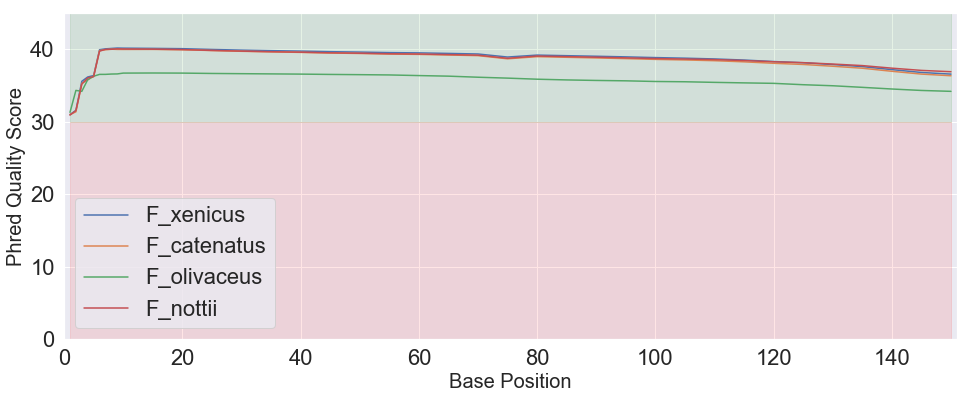

In [19]:
sns.set_style("darkgrid");
sns.set(font_scale = 2);
plt.figure(figsize=(16, 6));
ax = sns.lineplot(data=df,dashes=False, color="black", legend='brief');
ax.set(ylim=(0, 45),xlim=(0,151));
ax.set_ylabel("Phred Quality Score",fontsize=20);
ax.set_xlabel("Base Position",fontsize=20);
plt.fill_between(df.index, y1=30,y2=45, color="green",alpha=0.1);
plt.fill_between(df.index,y1=0,y2=30,color="red",alpha=0.1);
plt.savefig("multifastqc_plot.png")